In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [2]:
# Load face data
faces = fetch_olivetti_faces()
X = faces.data
n_samples, n_features = X.shape


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data


In [3]:
# Define the number of eigenfaces (components)
n_components = 100

# Compute PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X)

# Extract eigenfaces
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))



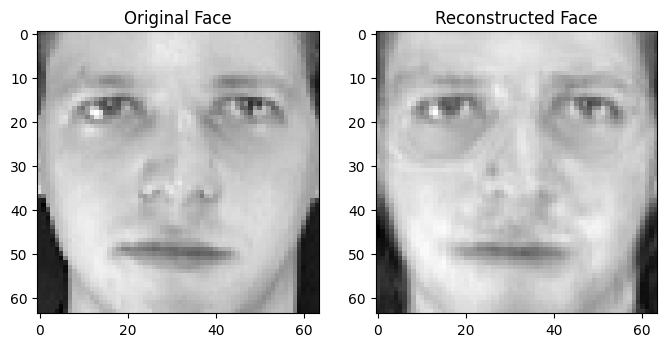

In [4]:
# Compression and reconstruction
def compress_and_reconstruct(image, pca, eigenfaces):
    # Flatten input image
    flattened_image = image.flatten()
    # Project image onto the eigenfaces
    projected = pca.transform(flattened_image.reshape(1, -1))
    # Reconstruct image from projected coefficients
    reconstructed = pca.inverse_transform(projected)
    # Reshape reconstructed image
    reconstructed_image = reconstructed.reshape(image.shape)
    return reconstructed_image

# Select a sample face for compression and reconstruction
sample_face = faces.images[0]

# Compress and reconstruct the sample face
reconstructed_face = compress_and_reconstruct(sample_face, pca, eigenfaces)

# Display original and reconstructed faces
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_face, cmap='gray')
plt.title('Original Face')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face, cmap='gray')
plt.title('Reconstructed Face')
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import random_noise

# Load your image from file path
image_path = "image16.jpg"  # Replace this with the actual file path of your image
image = imread(image_path)




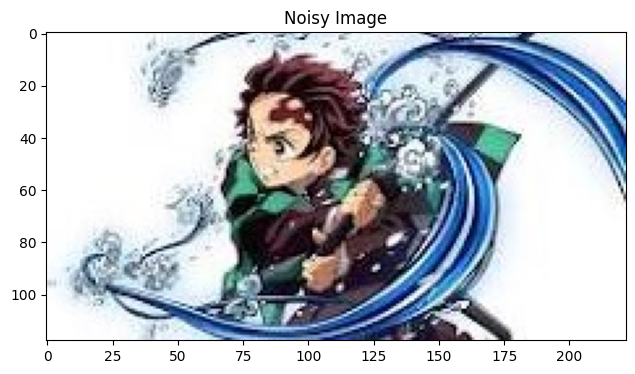

In [43]:
plt.figure(figsize=(10, 4))
plt.imshow(image, cmap='gray')
plt.title('Noisy Image')
plt.show()

In [44]:
# Convert image to grayscale
image_gray = rgb2gray(image)

# Convert image to float
image_gray = img_as_float(image)

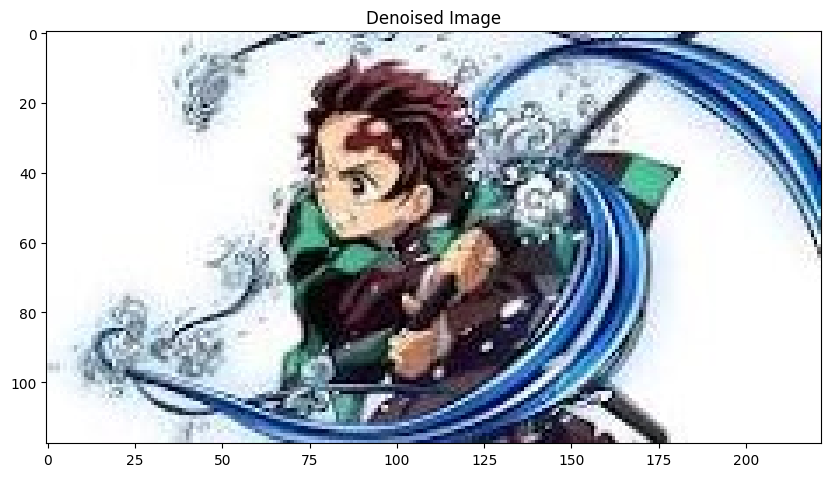

In [47]:
# Flatten the image
X = image_gray.flatten().reshape(-1, 1)

# Define the number of eigenfaces (components)
n_components = 1

# Compute PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X)

# Reconstruct the image using reduced components
reconstructed_image = pca.inverse_transform(pca.transform(X)).reshape(image_gray.shape)

# Display the denoised image
plt.figure(figsize=(10, 8))
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Denoised Image')
plt.show()